# PROJET WeRateDogs

## Table des matières

### Introduction

WeRateDogs (dog_rates) est un compte Twitter qui évalue les chiens des gens avec un commentaire amusant sur le chien, notre objectif est de mélanger ses données d'archives à partir de différentes sources pour créer une trame de données propre, puis d'effectuer une analyse et une visualisation des données.

### 1. Importation des librairies

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns
sns.set_theme()

### 2. Rassembler les données

### A. Les Archives de Twitter Améliorées

In [31]:
# Importation de df_twitter_archive
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### B. Les Fichiers de Prédictions d'images

In [32]:
# Importation de df_image_prediction
df_image_prediction =pd.read_csv('image-predictions.tsv',sep='\t')

### C. Les données supplémentaires de l'API Twitter

In [33]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

# consumer_key = 'xxxx'
# consumer_secret = 'xxxx'
# access_token = 'xxxx'
# access_secret = 'xxxx'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()

# Save each tweet's returned JSON as a new line in a .txt file

# with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    # for tweet_id in tweet_ids:
        # count += 1
        # print(str(count) + ": " + str(tweet_id))
        # try:
            # tweet = api.get_status(tweet_id, tweet_mode='extended')
            # print("Success")
            # json.dump(tweet._json, outfile)
            # outfile.write('\n')
        # except tweepy.errors.HTTPException as e:
            # print("Fail")
            # fails_dict[tweet_id] = e
            # pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [34]:
# Importation de df_tweet_json
df_tweet_json = pd.read_json('tweet-json.txt', encoding = "utf8", lines = True)

### 3. Evaluation des données

### 3.1 Evaluation programmatique

### A. Evaluation des Archives de Twitter Améliorées

In [35]:
# Observer les cinq (05) premières observations de df_twitter_archive
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
# Afficher cinq (05) observations par hasard de df_twitter_archive
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
683,788412144018661376,NaN,NaN,2016-10-18 16:11:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He breaks hearts for a living....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788412144...,11,10,Dexter,None,None,None,None
968,750147208377409536,NaN,NaN,2016-07-05 02:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","And finally, happy 4th of July from the squad ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/750147208...,13,10,None,None,None,None,None
1132,728760639972315136,NaN,NaN,2016-05-07 01:37:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When you're way too slow for the ""down low"" po...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728760639...,13,10,None,None,None,None,None
1774,678023323247357953,6.780211e+17,4.196984e+09,2015-12-19 01:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After getting lost in Reese's eyes for several...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1685,681654059175129088,NaN,NaN,2015-12-29 01:52:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681654059...,12,10,Toffee,None,None,pupper,None


In [37]:
# Types et valeurs manquantes de df_twitter_archive
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [38]:
# Les différents attributs de la colonne name
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [39]:
# Afficher la troisième intitulée de la colonne text
df_twitter_archive.text[2]

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

In [40]:
# Les différents url de df_twitter_archive
df_twitter_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [41]:
# Type de timestamp
type(df_twitter_archive.timestamp[0])

str

In [42]:
# Les valeurs dupliquées de df_twitter_archive
df_twitter_archive.duplicated().sum()

0

In [43]:
# Les différentes valeurs de rating_denominator
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [44]:
# Les différentes valeurs de rating_numerator
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

### B. Evaluation des Fichiers de Prédiction d'Images

In [45]:
# Les (05) premières observations de df_image_prediction
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
# Afficher (05) observations aléatoires de df_image_prediction
df_image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
488,675517828909424640,https://pbs.twimg.com/media/CV_r3v4VAAALvwg.jpg,1,Scottish_deerhound,0.240591,True,groenendael,0.156916,True,flat-coated_retriever,0.090899,True
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True
1397,768193404517830656,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,1,lion,0.396984,False,ram,0.300851,False,cheetah,0.094474,False
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,soft-coated_wheaten_terrier,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True


In [47]:
# Types et valeurs manquants de df_image_prediction
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
# Type de url de df_image_prediction
type(df_image_prediction.jpg_url[0])

str

In [49]:
# Total des valeurs dupliquées de df_image_prediction
df_image_prediction.duplicated().sum()

0

### C. Evaluation des Fichiers supplémentaires de l'API Twitter

In [50]:
# Différentes colonnes de df_tweet_json
df_tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [51]:
# Créer un dataframe à partir de df_tweet_json contenant id, retweet_count et favorite_count
df_tweet = pd.DataFrame(df_tweet_json, columns = ['id',
                                                 'retweet_count',
                                                 'favorite_count'])

In [52]:
# Afficher les 05 premières observations de df_weet
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [53]:
# Afficher (05) observations par hasard de df_tweet
df_tweet.sample(5)

,id,retweet_count,favorite_count
1515,690938899477221376,2245,4536
820,770093767776997377,3520,0
1285,708356463048204288,1520,3929
268,841320156043304961,6080,21402
1875,675109292475830276,1259,3006


In [54]:
# Type et manquants de df_tweet
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [55]:
# Total des valeurs dupliquées de df_tweet
df_tweet.duplicated().sum()

0

In [56]:
# Changer id de df_tweet par tweet_id
df_tweet = df_tweet.rename(columns = {'id':'tweet_id'})
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [57]:
# Sauvegarder df_tweet sous un format csv
df_tweet.to_csv('df_tweet.csv', index = False)

In [58]:
# Vérifier si le fichier est bien enrégistrer sous format csv
df_tweet_data = pd.read_csv('df_tweet.csv')
df_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### 3.2 Problèmes de structures 

- Les noms des espéces de chiens (doggo, floofer, pupper, puppo) sont séparés en quatre (04) colonnes différentes.
- Toutes ces bases de données sont liées mais séparées en trois (03) bases de données distinctes.

### 3.3 Problèmes de qualités

### A. Les Archives Améliorées de Twitter

- tweet_id doit être "string" et non "int".
- Certaines valeurs dans la colonne rating_denominator ne sont pas "10".
- certaines valeurs dans la colonne rating_numerator sont inférieures à "10"
- Certaines valeurs dans la colonne rating_numerator = zéro.
- Timestamp doit être sous format "data time" et non "str".
- retweeted_status_id doit être supprimé car nous nous intéressons au tweet.
- retweeted_status_user_id doit être supprimé car nous nous intéressons au tweet.
- retweeted_status_timestamp doit être supprimé car nous nous intéressons au tweet.
- Les valeurs nulles sont représentées par (None) dans la colonne de name.

### B. Les Images Prédictives

- tweet_id doit être "string" et non "int"
- Les noms p colonnes ont une lettre majuscule et une lettre minuscule

### C. Les Fichiers supplémenataires de Twitter

- L'identifian de la colonne name doit être "tweet_id" au lieu de "id"
- tweet_id doit être "string" et non "int"

### 4. Nettoyage des données

### A. Copie des bases

In [59]:
# Copie de chacunes de ces bases
clean_archive = df_twitter_archive.copy()
clean_image = df_image_prediction.copy()
clean_tweet = df_tweet_data.copy()

### B. Résolution des problèmes de structures

- **Les noms des espéces de chiens (doggo, floofer, pupper, puppo) sont séparés en quatre (04) colonnes différentes.**

#### Définir

Combiner les quatre (04) colonnes en une seule appelée dog_stage.

#### Code

In [60]:
# Combiner les (04) colonnes
clean_archive['dog_stage'] = clean_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN


In [61]:
# Supprimer les colonnes doggo floofer pupper et puppo
clean_archive = clean_archive.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

#### Tester

In [65]:
# Les différentes catégories de dog_stage
clean_archive['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

- **Toutes nos données sont liées mais séparées en trois (03) bases de données.**

#### Définir

Combiner ces (03) dataframes en une seule base.

#### Coder

In [63]:
# Fusionner les bases clean_archive et clean_tweet
clean_archive_df = pd.merge(clean_archive, clean_tweet, on = 'tweet_id', how = 'left')

In [64]:
# Fusionner clean_df et clean_image
clean_archive_data = pd.merge(clean_archive_df, clean_image, on = 'tweet_id', how = 'left')

#### Tester

In [66]:
# Description sommaire de clean_archive_data
clean_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### C. Résolution des problèmes de qualités

- **tweet_id doit être "string" et non "int".**

#### Définir

Convertissons tweet_id en chaîne.

#### Coder

In [68]:
# Convertir tweet_id en chaîne de caractère
clean_archive_data.tweet_id = clean_archive_data.tweet_id.astype(str)

#### Tester

In [70]:
# Vérifier alors le type de tweet_id
clean_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

- **Certaines valeurs dans la colonne rating_denominator ne sont pas "10".**

#### Définir

Remplacer toutes valeurs inférieures à 10 par 10.

#### Coder

In [71]:
clean_archive_data.rating_denominator = clean_archive_data.rating_denominator.replace( range(0,1000) , 10 ) 

#### Tester

In [72]:
clean_archive_data.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

- **Certaines valeurs dans la colonne rating_numerator sont inférieures à "10".**
- **Certaines valeurs dans la colonne rating_numerator = zéro.**

#### Définir

Ajouter 10 pour corriger ces valeurs.

#### Coder

In [73]:
clean_archive_data.rating_numerator[clean_archive_data['rating_numerator'] <= 10 ] = clean_archive_data.rating_numerator[clean_archive_data['rating_numerator'] <= 10 ].add(10)

C:\Users\Amen ANONWODJI\AppData\Local\Temp\ipykernel_9096\1116327963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archive_data.rating_numerator[clean_archive_data['rating_numerator'] <= 10 ] = clean_archive_data.rating_numerator[clean_archive_data['rating_numerator'] <= 10 ].add(10)


#### Tester

In [74]:
clean_archive_data.rating_numerator.value_counts()

12      567
11      473
20      462
13      370
19      158
18      102
14       71
17       56
15       39
16       32
420       2
10        2
75        2
45        1
60        1
44        1
121       1
143       1
99        1
26        1
144       1
80        1
24        1
50        1
204       1
1776      1
165       1
27        1
84        1
960       1
182       1
666       1
88        1
Name: rating_numerator, dtype: int64

- **timestamp doit être en format date.**

#### Définir

Convertir timestamp sous format date.

#### Coder

In [75]:
clean_archive_data['timestamp']= pd.to_datetime(clean_archive_data['timestamp'])

#### Tester

In [78]:
type(clean_archive_data['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

- **retweeted_status_id doit être supprimé car nous nous intéressons au tweet.**
- **retweeted_status_user_id doit être supprimé car nous nous intéressons au tweet.**
- **retweeted_status_timestamp doit être supprimé car nous nous intéressons au tweet.**

#### Définir

Supprimer toutes ces colonnes.

#### Coder

In [79]:
clean_archive_data = clean_archive_data.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp'])

#### Tester

In [80]:
# Différentes variables de clean_archive_data
clean_archive_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [81]:
# Description sommaire de clean_archive_data
clean_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2356 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2356 non-null   datetime64[ns, UTC]
 4   source                 2356 non-null   object             
 5   text                   2356 non-null   object             
 6   expanded_urls          2297 non-null   object             
 7   rating_numerator       2356 non-null   int64              
 8   rating_denominator     2356 non-null   int64              
 9   name                   2356 non-null   object             
 10  dog_stage              399 non-null    object             
 11  retweet_count          2354 non-null   float64          

- **Les valeurs nulles sont représentées par (None) dans la colonne de name.**

#### Définir

Remplacez ces valeurs par des valeurs nulles en utilisant la méthode de remplacement et la méthode numpy nan.

#### Coder

In [82]:
# Remplacer les valeurs nulles par Nan
clean_archive_data.name = clean_archive_data.name.replace("None", value = np.nan )

#### Tester

In [83]:
# Total de valeurs nulles
clean_archive_data.name.isnull().sum()

745

- **Certaines lettres en p commencent par une lettre majuscule tandis que d'autres sont en minuscule.**

#### Définir

Convertir les lettres miniscules en majuscules.

#### Coder

In [84]:
# Conversion
clean_archive_data.p1 = clean_archive_data.p1.str.replace('_', ' ')
clean_archive_data.p2 = clean_archive_data.p2.str.replace('_', ' ')
clean_archive_data.p3 = clean_archive_data.p3.str.replace('_', ' ')

#### Tester

In [85]:
clean_archive_data.p1.head(5)

0         orange
1      Chihuahua
2      Chihuahua
3    paper towel
4         basset
Name: p1, dtype: object

In [86]:
clean_archive_data.p2.head(5)

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
Name: p2, dtype: object

In [87]:
clean_archive_data.p3.head(5)

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
Name: p3, dtype: object

### 5. Stockage de données

In [88]:
# Enrégistrer sous format csv au nom de twitter_archive.csv
clean_archive_data.to_csv('twitter_archive_master.csv')

### 6. Analyse de données et Visualisation

### A. Pourcentage des différentes espèces de chien

In [89]:
stage_df = clean_archive_data.dog_stage.value_counts()
stage_df

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

(-1.1688700701851218,
 1.41740938618791,
 -1.3407043845000202,
 1.2036616490098864)

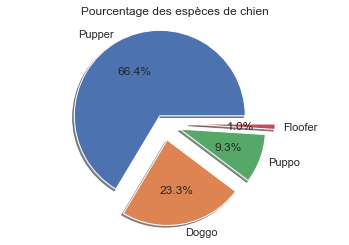

In [91]:
# Diagramme circulaire 
plt.pie(stage_df,
       labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer'],
       autopct = '%1.1f%%',
       shadow = True,
       explode = (0.1, 0.2, 0.2, 0.3))

plt.title('Pourcentage des espèces de chien')
plt.axis('equal')

- Pupper est l'espèce de chien la plus représentée (68.4%).
- Floofer est l'espèce de chien la moins représentée (0.9%).

### B. Relations et coefficient de corrélation entre les variables numériques.

In [92]:
# Découvrons les colonnes numériques plus facilement
df_numeric = clean_archive_data[['retweet_count', 'favorite_count', 'img_num', 'rating_numerator']]

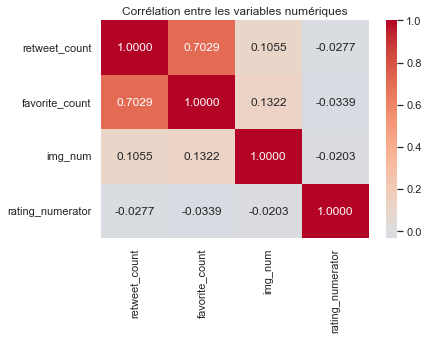

In [93]:
# Tracez une carte thermique pour montrer la corrélation entre les variables numériques et utilisez une palette divergente.
sns.heatmap(df_numeric.corr(), annot = True, fmt = '.4f', cmap = 'coolwarm', center = 0);
plt.title('Corrélation entre les variables numériques');

- La seule relation que nous pouvons mentionner ici est la forte corrélation positive entre le nombre de retweets et le nombre de favoris. et cela a du sens.